# Benchmarks for OO Game Design

First lets load in our benchmark code generated from the C++ program

In [28]:
import numpy as np

renderFile=open('./renderBench.txt',"r")
renderData=renderFile.readlines()

updateFile=open('./updateBench.txt',"r")
updateData=updateFile.readlines()
timings={}
updateDurations=[]
renderDurations=[]
updateResolution=''
renderResolution=''
for i in updateData :
    if 'Duration' in i :
        data=i.split('\t')
        updateDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        updateResolution=data[1]
        
for i in renderData :
    if 'Duration' in i :
        data=i.split('\t')
        renderDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        renderResolution=data[1]
print('Number of elements {0}'.format(len(renderDurations)))
timings['render']=renderDurations
timings['update']=updateDurations


Number of elements 2146


Now we can do some data analysis on the times and see what happens

In [29]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

renderDF=pd.DataFrame(data=timings)
renderDF.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])



,render,update
count,2146.000000,2146.000000
mean,98.639329,11800.783784
std,189.542458,558.797848
min,44.000000,11024.000000
25%,57.000000,11456.250000
50%,69.000000,11707.000000
75%,96.000000,11944.750000
90%,126.000000,12316.000000
99%,904.200000,13878.650000
99.9%,2615.490000,16172.070000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108610780>,
      dtype=object)

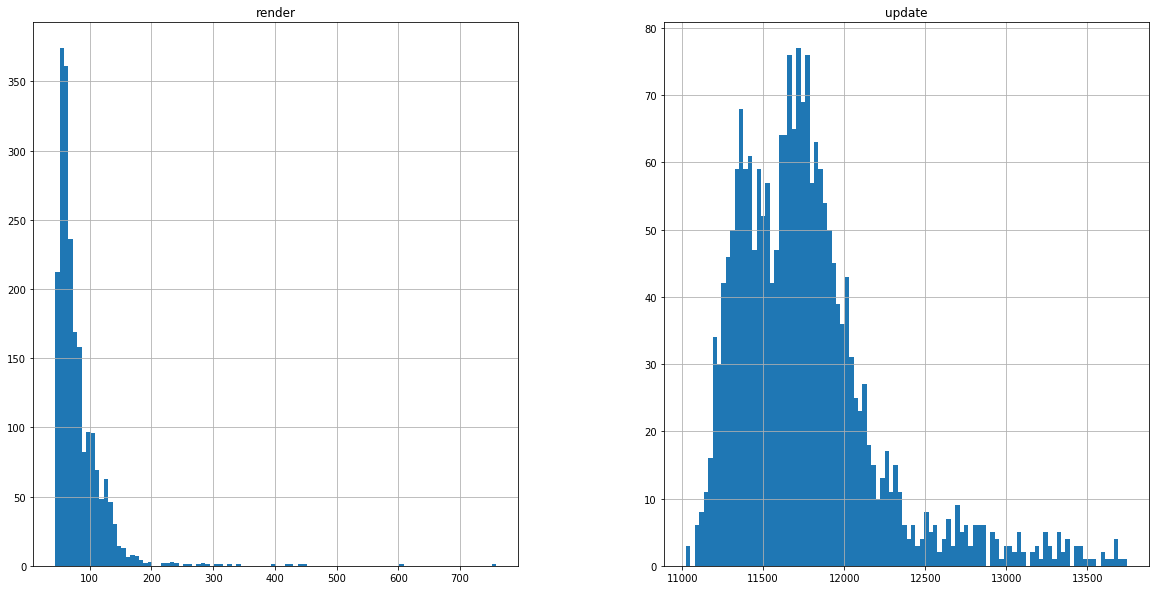

In [31]:
S = renderDF
S = S[~((S - S.mean()).abs() > 3.5 * S.std())]

ndf = pd.DataFrame(data=S)
#ndf['large'] = S
ndf.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])
ndf.hist(grid=True, figsize=(20, 10), bins=100)
